In [1]:
# code for google colab
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
! ls /mydrive

ModuleNotFoundError: No module named 'google.colab'

# New Section

In [8]:
# ls
# dataset face_detector
# ls dataset
# with_helmet without_helmet
# ls face_detector
!ls /mydrive/helmet_detection


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
# edit this directory location
import os
DIRECTORY = "D:/HOPE/AI Course Tamil/Deep Learning/HELMET DETECTION MODEL/realtime_helmet_detection-main/Dataset"
CATEGORIES = ["Helmet", "no helmet"]

In [2]:
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
      img_path = os.path.join(path, img)
      print(img_path)

D:/HOPE/AI Course Tamil/Deep Learning/HELMET DETECTION MODEL/realtime_helmet_detection-main/Dataset\Helmet\265.jpg
D:/HOPE/AI Course Tamil/Deep Learning/HELMET DETECTION MODEL/realtime_helmet_detection-main/Dataset\Helmet\266.jpg
D:/HOPE/AI Course Tamil/Deep Learning/HELMET DETECTION MODEL/realtime_helmet_detection-main/Dataset\Helmet\267.jpg
D:/HOPE/AI Course Tamil/Deep Learning/HELMET DETECTION MODEL/realtime_helmet_detection-main/Dataset\Helmet\268.jpg
D:/HOPE/AI Course Tamil/Deep Learning/HELMET DETECTION MODEL/realtime_helmet_detection-main/Dataset\Helmet\269.jpg
D:/HOPE/AI Course Tamil/Deep Learning/HELMET DETECTION MODEL/realtime_helmet_detection-main/Dataset\Helmet\270.jpg
D:/HOPE/AI Course Tamil/Deep Learning/HELMET DETECTION MODEL/realtime_helmet_detection-main/Dataset\Helmet\271.jpg
D:/HOPE/AI Course Tamil/Deep Learning/HELMET DETECTION MODEL/realtime_helmet_detection-main/Dataset\Helmet\273.jpg
D:/HOPE/AI Course Tamil/Deep Learning/HELMET DETECTION MODEL/realtime_helmet_det

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [4]:
tf.__version__

'2.18.0'

In [3]:
!pip install tensorflow

In [5]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [6]:
# edit this directory location
DIRECTORY = "D:/HOPE/AI Course Tamil/Deep Learning/HELMET DETECTION MODEL/realtime_helmet_detection-main/Dataset"
CATEGORIES = ["Helmet", "no helmet"]

In [7]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")

data = []
labels = []

[INFO] loading images...


In [8]:
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
    	image = load_img(img_path, target_size=(224, 224))
    	image = img_to_array(image)
    	image = preprocess_input(image)

    	data.append(image)
    	labels.append(category)

In [9]:
#Label Binarizer is an SciKit Learn class that accepts Categorical data as input and returns an Numpy array.
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

# convert labels into numbers
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [10]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

In [11]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [12]:
# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

C:\Users\jspri\AppData\Local\Temp\ipykernel_12908\4269477345.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  baseModel = MobileNetV2(weights="imagenet", include_top=False,


In [13]:
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [14]:
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

In [15]:
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [16]:
# compile our model
print("[INFO] compiling model...") 
# INIT_LR = 1e-4
# EPOCHS = 20
# BS = 32
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=INIT_LR,
#     decay_steps=10000,
#     decay_rate=0.9)
# opt = Adam(learning_rate=lr_schedule)
opt = Adam(learning_rate=INIT_LR,)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


In [17]:
# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] training head...


C:\Anaconda3\envs\facmas\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


C:\Anaconda3\envs\facmas\lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


38/38 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.7261 - loss: 0.6094 - val_accuracy: 0.9647 - val_loss: 0.2459
Epoch 2/20
 1/38 ━━━━━━━━━━━━━━━━━━━━ 31s 842ms/step - accuracy: 0.9333 - loss: 0.2664

C:\Anaconda3\envs\facmas\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 203ms/step - accuracy: 0.9333 - loss: 0.2664 - val_accuracy: 0.9679 - val_loss: 0.2402
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9450 - loss: 0.2473 - val_accuracy: 0.9904 - val_loss: 0.1148
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 227ms/step - accuracy: 1.0000 - loss: 0.1509 - val_accuracy: 0.9904 - val_loss: 0.1130
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9737 - loss: 0.1383 - val_accuracy: 0.9936 - val_loss: 0.0678
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 266ms/step - accuracy: 1.0000 - loss: 0.0888 - val_accuracy: 0.9904 - val_loss: 0.0671
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.9821 - loss: 0.1020 - val_accuracy: 0.9936 - val_loss: 0.0475
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 251ms/step - accuracy: 0.9375 - loss: 0.1443 - val_accuracy: 0.9936 - val_loss: 0.0471
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.9845 - loss: 0.0746 - val_accuracy: 0.9936 - val_loss: 

In [18]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

[INFO] evaluating network...


C:\Anaconda3\envs\facmas\lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step


In [19]:
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

In [20]:
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

              precision    recall  f1-score   support

      Helmet       0.99      0.99      0.99        92
   no helmet       1.00      1.00      1.00       220

    accuracy                           0.99       312
   macro avg       0.99      0.99      0.99       312
weighted avg       0.99      0.99      0.99       312



In [22]:
# serialize the model to disk
print("[INFO] saving helmet detector model...")
#model.save("helmet_detector.model", save_format="h5")
model.save("helmet_detector.h5")

[INFO] saving helmet detector model...


In [23]:
model.save("helmet_detector.keras")

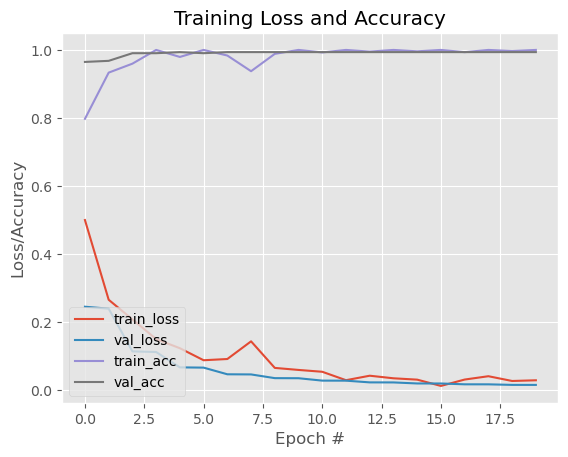

In [24]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")